In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/content/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [14]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(['median_house_value','ocean_proximity' ], axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2)

In [28]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
8022,-118.12,33.84,37.0,2143.0,382.0,1047.0,377.0,4.4423,216000.0
16220,-121.35,37.97,33.0,3656.0,681.0,1698.0,671.0,3.1406,93900.0
1491,-122.02,37.95,22.0,3526.0,510.0,1660.0,508.0,5.6642,237000.0
2519,-122.18,39.70,23.0,1658.0,307.0,836.0,297.0,3.3500,85400.0
14790,-117.12,32.56,20.0,2524.0,682.0,1819.0,560.0,2.9286,257700.0
...,...,...,...,...,...,...,...,...,...
17832,-121.86,37.41,16.0,2938.0,589.0,1718.0,568.0,5.5073,178900.0
17572,-121.92,37.32,39.0,836.0,254.0,704.0,272.0,3.5256,192600.0
18838,-122.65,41.72,15.0,3643.0,801.0,1784.0,743.0,1.8533,57500.0
11066,-117.89,33.78,16.0,6352.0,1747.0,5085.0,1649.0,2.8835,193800.0


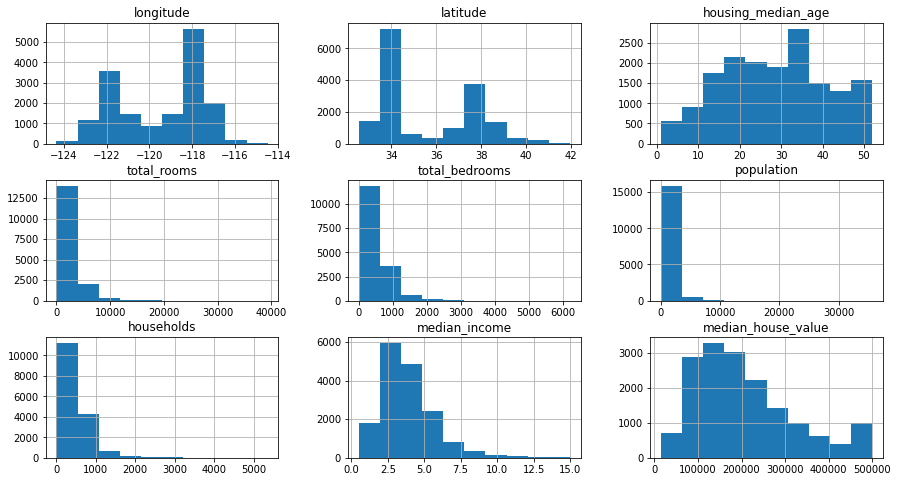

In [7]:
train_data.hist(figsize=(15, 8));

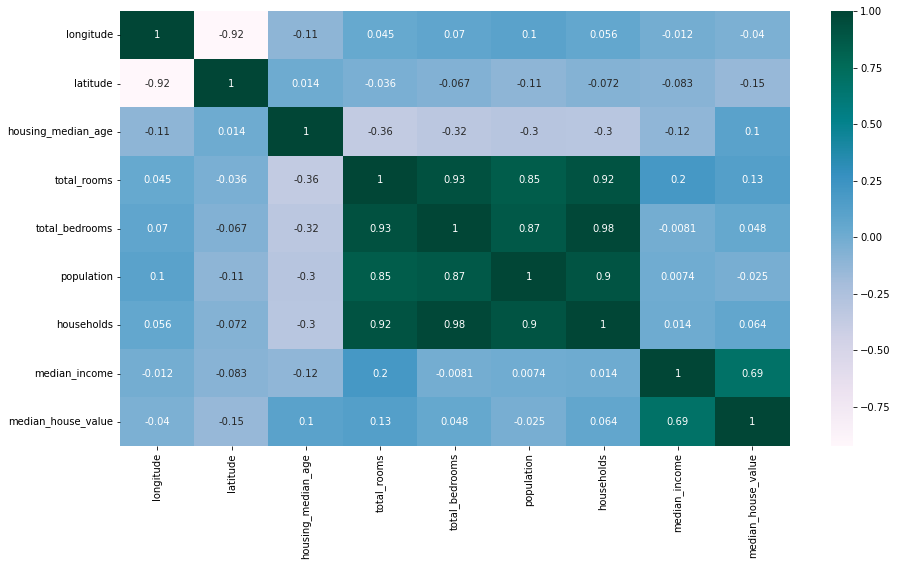

In [10]:
plt.figure(figsize=(15, 8))
sns.heatmap(
    train_data.corr(),
    annot=True,
    cmap="PuBuGn"
)

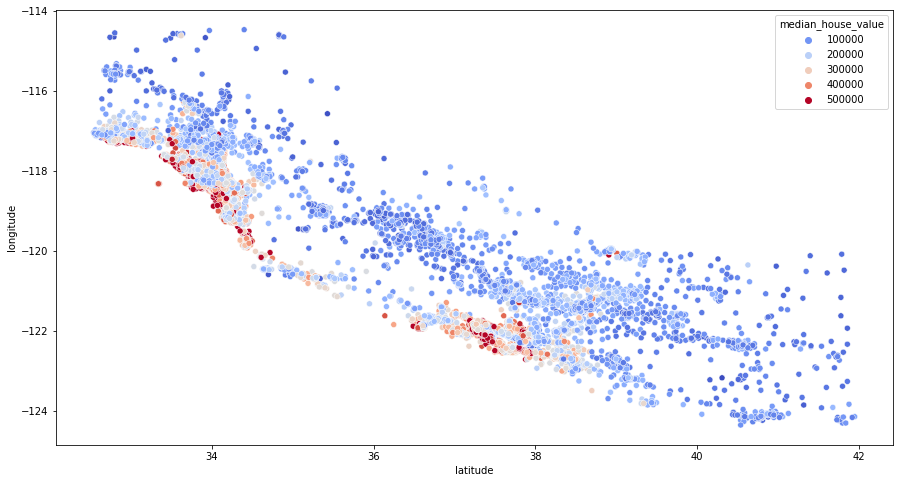

In [11]:
plt.figure(figsize=(15, 8))
sns.scatterplot(
    data=train_data,
    x="latitude",
    y="longitude",
    hue="median_house_value",
    palette="coolwarm"
)

In [30]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
z=forest.score(X_test, y_test)

In [32]:
print("Accuracy: ", z*100)

Accuracy:  80.6866092408005
